In [1345]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1346]:
df = pd.read_csv('train loan.csv')

In [1347]:
df.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [1348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            68899 non-null  object 
 5   City_Category                        68899 non-null  object 
 6   Employer_Code                        65695 non-null  object 
 7   Employer_Category1                   65695 non-null  object 
 8   Employer_Category2                   65415 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 11  Primary_Bank_Type           

In [1349]:
df.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
dtype: int

In [1350]:
df['DOB']

0        23/07/79
1        07/12/86
2        10/12/82
3        30/01/89
4        19/04/85
           ...   
69708    31/07/83
69709    27/01/71
69710    01/02/92
69711    27/06/78
69712    31/12/89
Name: DOB, Length: 69713, dtype: object

In [1351]:
def d(x):
  try:
     return x.replace(x.split("/")[2],"19"+x.split("/")[2])
  except:
    return x

df["DOB"]=df["DOB"].apply(d)

In [1352]:
df['DOB'].head()

0    23/07/1979
1    07/12/1986
2    10/12/1982
3    30/01/1989
4    19/04/1985
Name: DOB, dtype: object

In [1353]:
from datetime import date

In [1354]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%d/%m/%Y')

In [1355]:
current_year=date.today()
current_year

datetime.date(2023, 6, 17)

In [1356]:
def age (x):
    current_year=date.today().year
    return current_year-x.year



In [1357]:
df["Age"]=df["DOB"].apply(age)
df["Age"]

0        44.0
1        37.0
2        41.0
3        34.0
4        38.0
         ... 
69708    40.0
69709    52.0
69710    31.0
69711    45.0
69712    34.0
Name: Age, Length: 69713, dtype: float64

In [1358]:
df[df['Age']<0]

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age


In [1359]:
df.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
Age       

In [1360]:
df[df['DOB'].isna()]

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age
48108,APPF70614332332,Male,NaT,05/09/16,C10004,A,NaN,NaN,NaN,0.0,...,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,NaN
48403,APPW20050127804,Male,NaT,05/09/16,C10008,A,NaN,NaN,NaN,833.3,...,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,NaN
48405,APPY70297276022,Male,NaT,05/09/16,C10019,B,NaN,NaN,NaN,0.0,...,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,NaN
51441,APPI80123699031,Male,NaT,09/09/16,C10002,A,NaN,NaN,NaN,0.0,...,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,NaN
59333,APPU10731522427,Male,NaT,20/09/16,C10025,A,NaN,NaN,NaN,0.0,...,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,NaN
59334,APPV80984184547,Male,NaT,20/09/16,C10001,A,NaN,NaN,NaN,0.0,...,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,NaN
59335,APPW10698163607,Male,NaT,20/09/16,C10001,A,NaN,NaN,NaN,0.0,...,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,NaN
59336,APPX10241882727,Male,NaT,20/09/16,C10004,A,NaN,NaN,NaN,0.0,...,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,NaN
59337,APPY90481287839,Male,NaT,20/09/16,C10003,A,NaN,NaN,NaN,0.0,...,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,NaN
59338,APPZ80978459945,Male,NaT,20/09/16,C10002,A,NaN,NaN,NaN,0.0,...,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,NaN


In [1361]:
df = df.dropna(subset=['DOB'])

In [1362]:
df.isnull().sum()

ID                                         0
Gender                                     0
DOB                                        0
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4003
Employer_Category1                      4003
Employer_Category2                      4283
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9376
Primary_Bank_Type                       9376
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27694
Loan_Period                            27694
Interest_Rate                          47422
EMI                                    47422
Var1                                       0
Approved                                   0
Age       

In [1363]:
df['City_Code']

0        C10001
1        C10003
2        C10125
3        C10477
4        C10002
          ...  
69708    C10006
69709    C10116
69710    C10022
69711    C10002
69712    C10003
Name: City_Code, Length: 69698, dtype: object

In [1364]:
df['City_Code'].value_counts(dropna=False)

C10001    10004
C10002     8714
C10003     8663
C10004     5841
C10005     5564
          ...  
C10582        1
C10573        1
C10644        1
C10700        1
C10686        1
Name: City_Code, Length: 679, dtype: int64

<AxesSubplot:xlabel='City_Category', ylabel='count'>

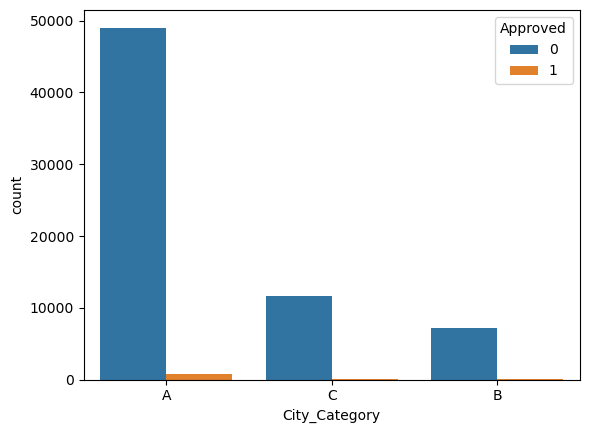

In [1365]:
sns.countplot(x=df['City_Category'],hue=df['Approved'])

In [1366]:
df['Employer_Category1'].value_counts(dropna=False)

A      33336
B      18056
C      14303
NaN     4003
Name: Employer_Category1, dtype: int64

In [1367]:
df['Employer_Category2'].value_counts(dropna=False)

4.0    57582
NaN     4283
1.0     4258
2.0     1955
3.0     1620
Name: Employer_Category2, dtype: int64

In [1368]:
df['City_Category'].value_counts(dropna=False)

A      49871
C      11694
B       7319
NaN      814
Name: City_Category, dtype: int64

In [1369]:
df['City_Category'] = df['City_Category'].fillna(df['City_Category'].mode()[0])

In [1370]:
df['Employer_Category1'].value_counts(dropna=False)

A      33336
B      18056
C      14303
NaN     4003
Name: Employer_Category1, dtype: int64

In [1371]:
df['Employer_Category1'] = df['Employer_Category1'].fillna(df['Employer_Category1'].mode()[0])

In [1372]:
df['Employer_Category2'] = df['Employer_Category2'].fillna(df['Employer_Category2'].median())

In [1373]:
df['Employer_Category2'].value_counts(dropna=False)

4.0    61865
1.0     4258
2.0     1955
3.0     1620
Name: Employer_Category2, dtype: int64

In [1374]:
df.isnull().sum()

ID                                         0
Gender                                     0
DOB                                        0
Lead_Creation_Date                         0
City_Code                                814
City_Category                              0
Employer_Code                           4003
Employer_Category1                         0
Employer_Category2                         0
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9376
Primary_Bank_Type                       9376
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27694
Loan_Period                            27694
Interest_Rate                          47422
EMI                                    47422
Var1                                       0
Approved                                   0
Age       

In [1375]:
df[df['Employer_Code']=='COM0000002']

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age
1,APPD40611263344,Male,1986-12-07,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0,37.0
187,APPB40237575507,Male,1988-02-18,01/07/16,C10003,A,COM0000002,C,1.0,5000.0,...,S122,F,0.0,88000.0,5.0,NaN,NaN,10,0,35.0
212,APPJ10292946942,Female,1989-08-24,01/07/16,C10003,A,COM0000002,C,1.0,2500.0,...,S143,B,0.0,30000.0,5.0,13.00,683.0,10,0,34.0
480,APPR70032524536,Female,1984-07-04,01/07/16,C10003,A,COM0000002,C,1.0,4880.0,...,S143,B,2489.7,NaN,NaN,NaN,NaN,0,0,39.0
483,APPW10669212041,Female,1984-07-04,01/07/16,C10003,A,COM0000002,C,1.0,4880.0,...,S133,E,2215.7,NaN,NaN,NaN,NaN,0,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69320,APPC50556447049,Male,1983-11-01,30/09/16,C10003,A,COM0000002,C,1.0,6000.0,...,S122,G,0.0,104000.0,4.0,NaN,NaN,7,0,40.0
69388,APPC10799454801,Male,1986-07-20,30/09/16,C10004,A,COM0000002,C,1.0,7800.0,...,S122,G,1000.0,100000.0,5.0,NaN,NaN,10,0,37.0
69411,APPG50185673801,Male,1989-07-25,30/09/16,C10005,A,COM0000002,C,1.0,3200.0,...,S122,G,850.0,50000.0,5.0,NaN,NaN,10,0,34.0
69508,APPK70535978202,Male,1991-02-12,30/09/16,C10007,A,COM0000002,C,1.0,3400.0,...,S122,G,0.0,62000.0,4.0,NaN,NaN,4,0,32.0


In [1376]:
df.groupby(['Employer_Category1','Approved'])[['Loan_Amount']].mean()

Loan_Amount
Employer_Category1 Approved              
A                  0         39022.196955
                   1         47169.435216
B                  0         38726.908998
                   1         49641.638225
C                  0         40309.886760
                   1         51800.796813

In [1377]:
df.groupby(['Employer_Category2','Approved'])[['Loan_Amount']].mean()

Loan_Amount
Employer_Category2 Approved              
1.0                0         45435.004791
                   1         59323.529412
2.0                0         43114.606742
                   1         55250.000000
3.0                0         34856.716418
                   1         35000.000000
4.0                0         38657.980273
                   1         48613.861386

In [1378]:
df.isnull().sum()

ID                                         0
Gender                                     0
DOB                                        0
Lead_Creation_Date                         0
City_Code                                814
City_Category                              0
Employer_Code                           4003
Employer_Category1                         0
Employer_Category2                         0
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9376
Primary_Bank_Type                       9376
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27694
Loan_Period                            27694
Interest_Rate                          47422
EMI                                    47422
Var1                                       0
Approved                                   0
Age       

In [1379]:
df['Customer_Existing_Primary_Bank_Code'].value_counts(dropna=False)

B001    14197
B002    10880
B003     9515
NaN      9376
B004     7070
B005     1920
B006     1662
B007     1239
B008      945
B009      941
B010      920
B012      789
B013      785
B011      775
B014      606
B015      561
B016      518
B017      495
B018      475
B019      445
B020      420
B021      401
B022      388
B023      355
B024      335
B025      327
B027      268
B026      262
B028      258
B029      206
B030      202
B031      201
B033      188
B032      187
B034      184
B035      161
B038      149
B036      145
B039      137
B037      137
B040      133
B041       98
B042       80
B043       70
B044       60
B046       48
B045       47
B047       39
B048       34
B049       15
B050       12
B054        8
B051        8
B052        7
B053        5
B055        4
B056        4
B057        1
Name: Customer_Existing_Primary_Bank_Code, dtype: int64

In [1380]:
df['Primary_Bank_Type'].value_counts(dropna=False)

P      39619
G      20703
NaN     9376
Name: Primary_Bank_Type, dtype: int64

In [1381]:
from sklearn.impute import SimpleImputer

In [1382]:
imputer = SimpleImputer(strategy='most_frequent',missing_values=np.nan)

In [1383]:
df['Primary_Bank_Type']= imputer.fit_transform(df[['Primary_Bank_Type']])

In [1384]:
df['Primary_Bank_Type'].value_counts(dropna=False)

P    48995
G    20703
Name: Primary_Bank_Type, dtype: int64

In [1385]:
df['Existing_EMI'].value_counts(dropna=False)

0.0       46606
500.0      2141
1000.0     1410
300.0      1260
400.0       967
          ...  
873.1         1
88.4          1
2044.5        1
6350.0        1
2364.8        1
Name: Existing_EMI, Length: 3246, dtype: int64

In [1386]:
df['Existing_EMI'] = df['Existing_EMI'].fillna(df['Existing_EMI'].median())

In [1387]:
df['Existing_EMI'].value_counts(dropna=False)

0.0       46657
500.0      2141
1000.0     1410
300.0      1260
400.0       967
          ...  
873.1         1
88.4          1
2044.5        1
6350.0        1
2364.8        1
Name: Existing_EMI, Length: 3245, dtype: int64

<AxesSubplot:>

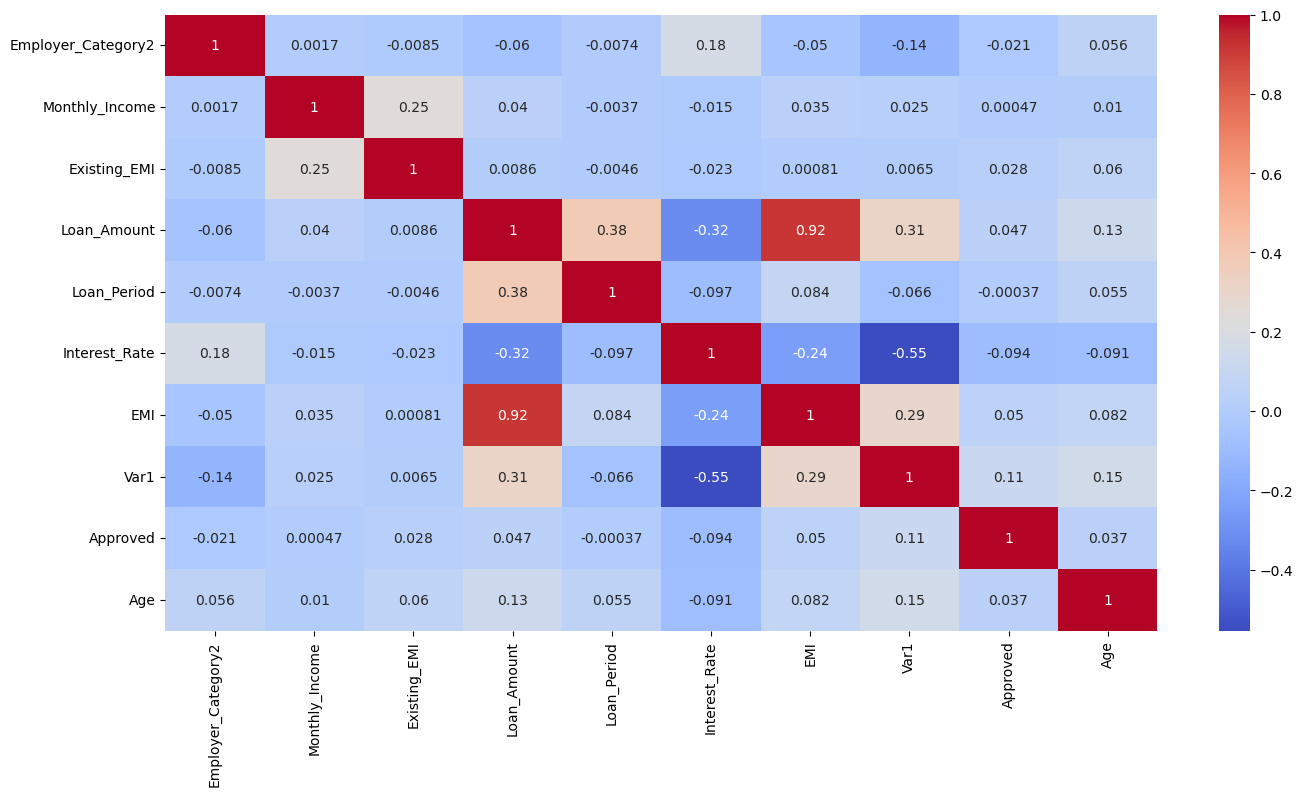

In [1388]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

<AxesSubplot:xlabel='Loan_Amount', ylabel='EMI'>

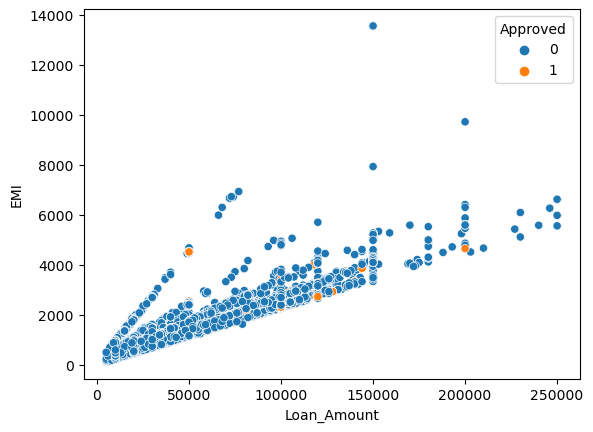

In [1389]:
sns.scatterplot(x='Loan_Amount',y='EMI',data=df,hue=df['Approved'])

In [1390]:
df.isnull().sum()

ID                                         0
Gender                                     0
DOB                                        0
Lead_Creation_Date                         0
City_Code                                814
City_Category                              0
Employer_Code                           4003
Employer_Category1                         0
Employer_Category2                         0
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9376
Primary_Bank_Type                          0
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                               0
Loan_Amount                            27694
Loan_Period                            27694
Interest_Rate                          47422
EMI                                    47422
Var1                                       0
Approved                                   0
Age       

In [1391]:
df.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age
0,APPC90493171225,Female,1979-07-23,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,44.0
1,APPD40611263344,Male,1986-12-07,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0,37.0
2,APPE70289249423,Male,1982-12-10,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0,41.0
3,APPF80273865537,Male,1989-01-30,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0,34.0
4,APPG60994436641,Male,1985-04-19,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0,38.0


In [1242]:
df['Loan_Amount'] = df['Loan_Amount'].fillna(df['Loan_Amount'].median())

In [1243]:
df[df['Interest_Rate'].isna()]['Loan_Amount']

0        30000.0
2        45000.0
3        92000.0
4        50000.0
5        30000.0
          ...   
69705    24000.0
69707    30000.0
69708    30000.0
69709    30000.0
69711    80000.0
Name: Loan_Amount, Length: 47422, dtype: float64

In [1244]:
df['Interest_Rate'].describe()

count    22276.000000
mean        19.213570
std          5.847136
min         11.990000
25%         15.250000
50%         18.000000
75%         20.000000
max         37.000000
Name: Interest_Rate, dtype: float64

In [1245]:
# imputer = KNNImputer(n_neighbors=5,missing_values=np.nan)

# # Fit and transform the DataFrame
# df['Interest_Rate'] = imputer.fit_transform(df[['Interest_Rate']])


In [1246]:
df['Interest_Rate'] = df['Interest_Rate'].fillna(df['Interest_Rate'].median())

In [1247]:
df['Interest_Rate'].describe()

count    69698.000000
mean        18.387866
std          3.353653
min         11.990000
25%         18.000000
50%         18.000000
75%         18.000000
max         37.000000
Name: Interest_Rate, dtype: float64

In [1248]:
df['Interest_Rate'].mean()

18.387865935894574

In [1249]:
df.isnull().sum()

ID                                         0
Gender                                     0
DOB                                        0
Lead_Creation_Date                         0
City_Code                                814
City_Category                              0
Employer_Code                           4003
Employer_Category1                         0
Employer_Category2                         0
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9376
Primary_Bank_Type                          0
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                               0
Loan_Amount                                0
Loan_Period                            27694
Interest_Rate                              0
EMI                                    47422
Var1                                       0
Approved                                   0
Age       

In [1250]:
df['Loan_Period'] = df['Loan_Period'].fillna(df['Loan_Period'].median())

In [1251]:
df['Loan_Period'].median()

4.0

In [1252]:
df['EMI'] = df['EMI'].fillna(df['EMI'].median())

In [1253]:
df['EMI'].median()

941.0

In [1254]:
df.isnull().sum()

ID                                        0
Gender                                    0
DOB                                       0
Lead_Creation_Date                        0
City_Code                               814
City_Category                             0
Employer_Code                          4003
Employer_Category1                        0
Employer_Category2                        0
Monthly_Income                            0
Customer_Existing_Primary_Bank_Code    9376
Primary_Bank_Type                         0
Contacted                                 0
Source                                    0
Source_Category                           0
Existing_EMI                              0
Loan_Amount                               0
Loan_Period                               0
Interest_Rate                             0
EMI                                       0
Var1                                      0
Approved                                  0
Age                             

In [1255]:
df = df.drop('City_Code', axis =1)

In [1256]:
df.isnull().sum()

ID                                        0
Gender                                    0
DOB                                       0
Lead_Creation_Date                        0
City_Category                             0
Employer_Code                          4003
Employer_Category1                        0
Employer_Category2                        0
Monthly_Income                            0
Customer_Existing_Primary_Bank_Code    9376
Primary_Bank_Type                         0
Contacted                                 0
Source                                    0
Source_Category                           0
Existing_EMI                              0
Loan_Amount                               0
Loan_Period                               0
Interest_Rate                             0
EMI                                       0
Var1                                      0
Approved                                  0
Age                                       0
dtype: int64

In [1257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69698 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ID                                   69698 non-null  object        
 1   Gender                               69698 non-null  object        
 2   DOB                                  69698 non-null  datetime64[ns]
 3   Lead_Creation_Date                   69698 non-null  object        
 4   City_Category                        69698 non-null  object        
 5   Employer_Code                        65695 non-null  object        
 6   Employer_Category1                   69698 non-null  object        
 7   Employer_Category2                   69698 non-null  float64       
 8   Monthly_Income                       69698 non-null  float64       
 9   Customer_Existing_Primary_Bank_Code  60322 non-null  object        
 10  Primary_Ba

In [1258]:
df['Lead_Creation_Date'] = pd.to_datetime(df['Lead_Creation_Date'],format='%d/%m/%y')

In [1259]:
df['Day_Name']=df['Lead_Creation_Date'].dt.day_name()

In [1260]:
df['Month_Name'] = df['Lead_Creation_Date'].dt.month_name()

In [1261]:
df['Lead_Creation_Date'].dt.month

0        7
1        7
2        7
3        7
4        7
        ..
69708    9
69709    9
69710    9
69711    9
69712    9
Name: Lead_Creation_Date, Length: 69698, dtype: int64

In [1262]:
df['Lead_Creation_Date']

0       2016-07-15
1       2016-07-04
2       2016-07-19
3       2016-07-09
4       2016-07-20
           ...    
69708   2016-09-30
69709   2016-09-30
69710   2016-09-30
69711   2016-09-30
69712   2016-09-30
Name: Lead_Creation_Date, Length: 69698, dtype: datetime64[ns]

In [1263]:
df['Day_Number'] = df['Lead_Creation_Date'].dt.day

In [1264]:
df.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,...,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age,Day_Name,Month_Name,Day_Number
0,APPC90493171225,Female,1979-07-23,2016-07-15,A,COM0044082,A,4.0,2000.0,B001,...,30000.0,4.0,18.00,941.0,0,0,44.0,Friday,July,15
1,APPD40611263344,Male,1986-12-07,2016-07-04,A,COM0000002,C,1.0,3500.0,B002,...,20000.0,2.0,13.25,953.0,10,0,37.0,Monday,July,4
2,APPE70289249423,Male,1982-12-10,2016-07-19,C,COM0005267,C,4.0,2250.0,B003,...,45000.0,4.0,18.00,941.0,0,0,41.0,Tuesday,July,19
3,APPF80273865537,Male,1989-01-30,2016-07-09,C,COM0004143,A,4.0,3500.0,B003,...,92000.0,5.0,18.00,941.0,7,0,34.0,Saturday,July,9
4,APPG60994436641,Male,1985-04-19,2016-07-20,A,COM0001781,A,4.0,10000.0,B001,...,50000.0,2.0,18.00,941.0,10,0,38.0,Wednesday,July,20


In [1265]:
dummies = pd.get_dummies(df[['Gender','City_Category','Employer_Category1', 'Primary_Bank_Type',
                            'Contacted','Day_Name','Month_Name','Source_Category']],drop_first=True)

In [1266]:
dummies.columns

Index(['Gender_Male', 'City_Category_B', 'City_Category_C',
       'Employer_Category1_B', 'Employer_Category1_C', 'Primary_Bank_Type_P',
       'Contacted_Y', 'Day_Name_Monday', 'Day_Name_Saturday',
       'Day_Name_Sunday', 'Day_Name_Thursday', 'Day_Name_Tuesday',
       'Day_Name_Wednesday', 'Month_Name_July', 'Month_Name_September',
       'Source_Category_B', 'Source_Category_C', 'Source_Category_D',
       'Source_Category_E', 'Source_Category_F', 'Source_Category_G'],
      dtype='object')

In [1267]:
dummies

,Gender_Male,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Primary_Bank_Type_P,Contacted_Y,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,...,Day_Name_Tuesday,Day_Name_Wednesday,Month_Name_July,Month_Name_September,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,1,0,1,0,1,0,0,0,...,1,0,1,0,1,0,0,0,0,0
3,1,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
69709,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
69710,0,1,0,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
69711,1,0,0,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [1268]:
df['Month_Name'].value_counts()

September    25718
August       22404
July         21576
Name: Month_Name, dtype: int64

<AxesSubplot:xlabel='Month_Name', ylabel='count'>

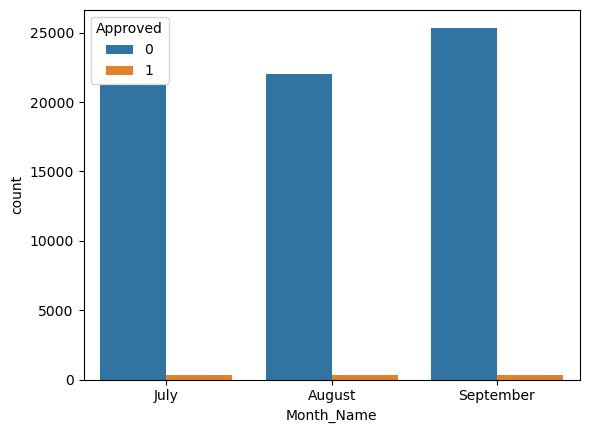

In [1269]:
sns.countplot(x=df['Month_Name'],hue=df['Approved'])

<AxesSubplot:xlabel='Primary_Bank_Type', ylabel='count'>

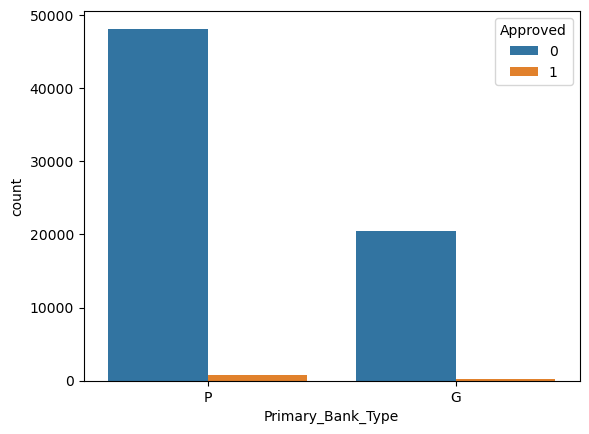

In [1270]:
sns.countplot(x=df['Primary_Bank_Type'],hue=df['Approved'])

<AxesSubplot:>

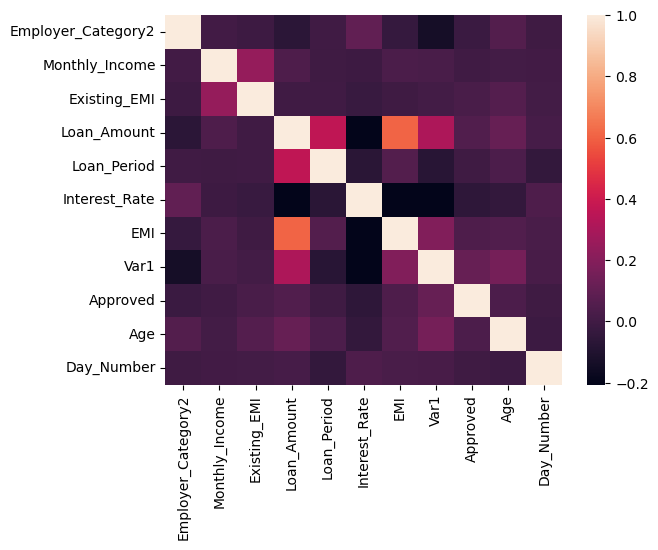

In [1271]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Primary_Bank_Type', ylabel='Loan_Amount'>

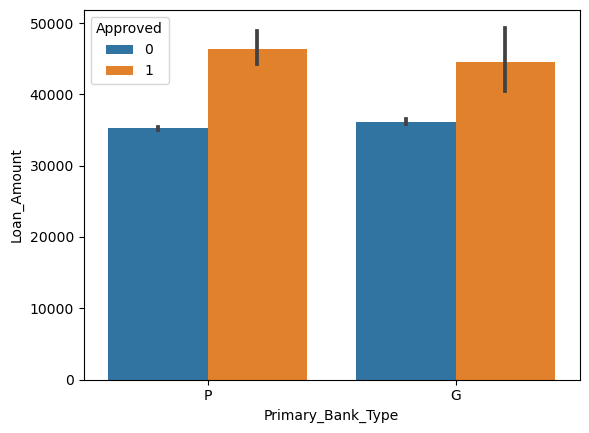

In [1272]:
sns.barplot(x=df['Primary_Bank_Type'],y=df['Loan_Amount'],hue=df['Approved'])

<AxesSubplot:xlabel='City_Category', ylabel='Loan_Amount'>

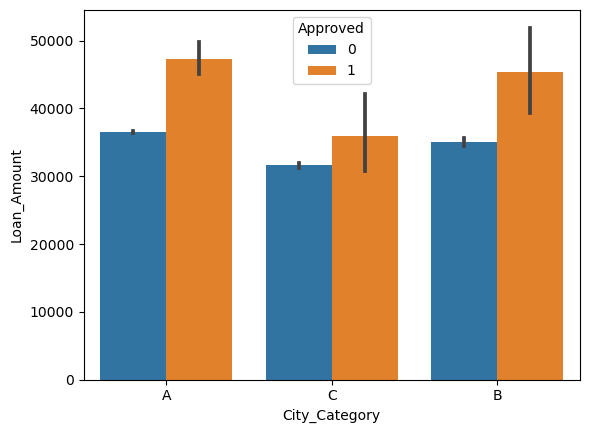

In [1273]:
sns.barplot(x=df['City_Category'],y=df['Loan_Amount'],hue=df['Approved'])

<AxesSubplot:xlabel='Month_Name', ylabel='Loan_Amount'>

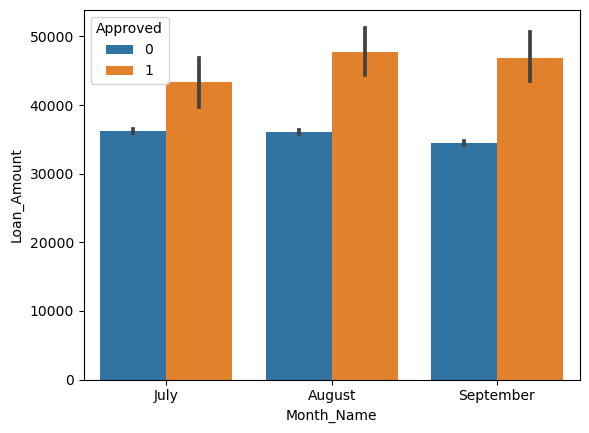

In [1274]:
sns.barplot(x=df['Month_Name'],y=df['Loan_Amount'],hue=df['Approved'])

<AxesSubplot:xlabel='Day_Name', ylabel='Loan_Amount'>

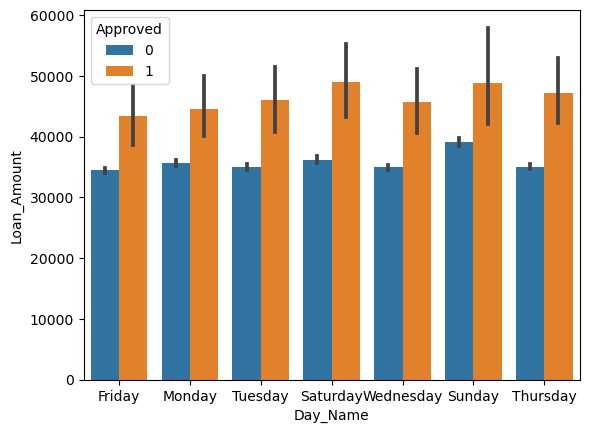

In [1275]:
sns.barplot(x=df['Day_Name'],y=df['Loan_Amount'],hue=df['Approved'])

([<matplotlib.patches.Wedge at 0x199d4eb01c0>,
 [Text(-0.24504239799583136, 1.0723591857136547, ''),
  Text(-0.39867079292309254, -1.0252129529371314, ''),
  Text(0.706897684470165, -0.8427904031790581, ''),
  Text(1.028554446195139, -0.38996891057135746, ''),
  Text(1.096019277614188, -0.0934972892552162, ''),
  Text(1.0999999988911473, -4.9391051604634935e-05, '')])

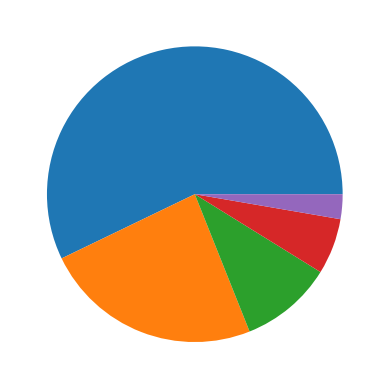

In [1276]:
plt.pie(df['Loan_Period'].value_counts().values)

C:\Users\MAYUR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Period', ylabel='count'>

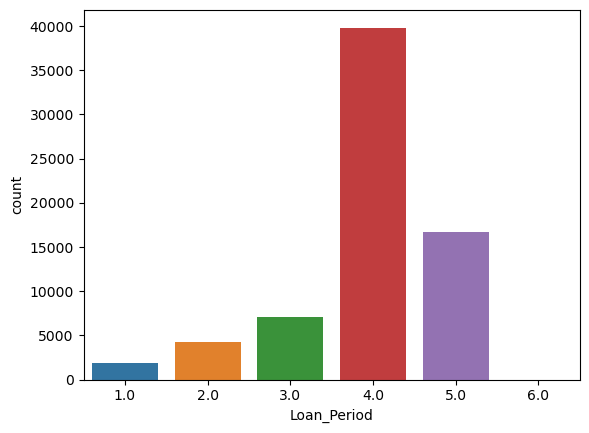

In [1277]:
sns.countplot(df['Loan_Period'])

<AxesSubplot:xlabel='Loan_Period', ylabel='Interest_Rate'>

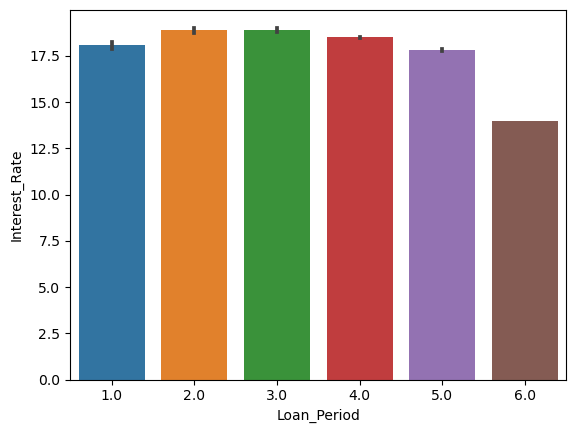

In [1278]:
sns.barplot(x=df['Loan_Period'],y=df['Interest_Rate'])

In [1279]:
(df[df['Loan_Period']==5]).mean()

C:\Users\MAYUR\AppData\Local\Temp\ipykernel_27080\2493286766.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  (df[df['Loan_Period']==5]).mean()
C:\Users\MAYUR\AppData\Local\Temp\ipykernel_27080\2493286766.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (df[df['Loan_Period']==5]).mean()


Employer_Category2        3.663844
Monthly_Income         6574.695328
Existing_EMI            308.508494
Loan_Amount           49752.897376
Loan_Period               5.000000
Interest_Rate            17.816237
EMI                    1040.967754
Var1                      6.072299
Approved                  0.020357
Age                      38.715847
Day_Number               15.062691
dtype: float64

<AxesSubplot:xlabel='Approved', ylabel='Monthly_Income'>

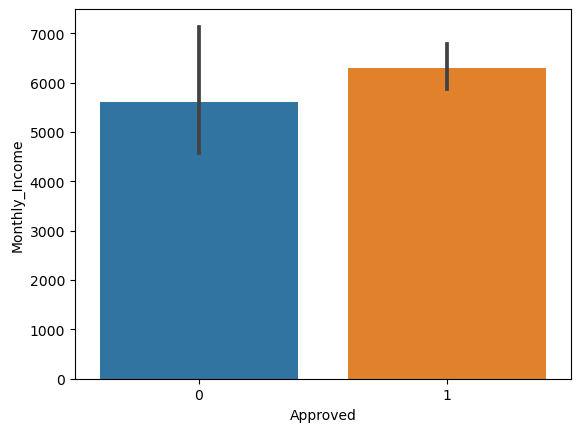

In [1280]:
sns.barplot(x=df['Approved'],y=df['Monthly_Income'])

<function matplotlib.pyplot.yticks(ticks=None, labels=None, **kwargs)>

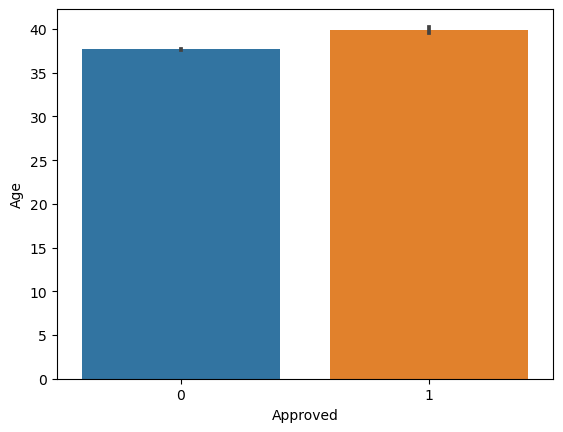

In [1281]:
sns.barplot(x=df['Approved'],y=df['Age'])
plt.yticks

<AxesSubplot:xlabel='Age', ylabel='count'>

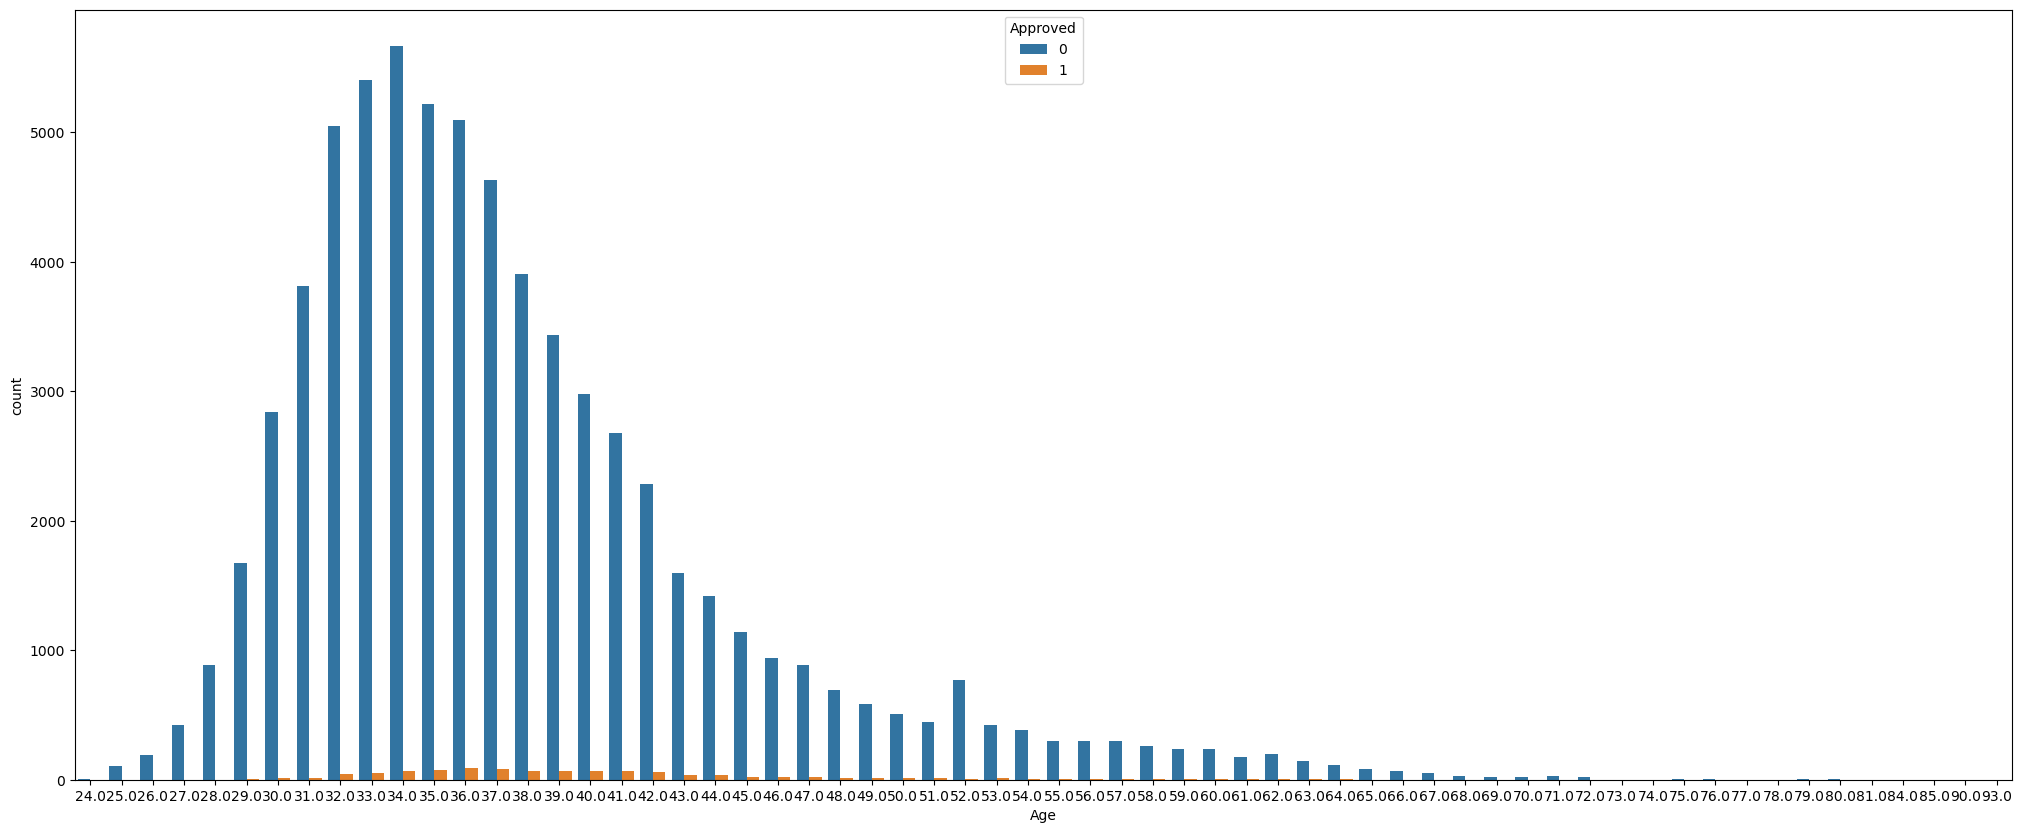

In [1282]:
plt.figure(figsize=(25,10))
sns.countplot(x=df['Age'],hue=df['Approved'])

In [1283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69698 entries, 0 to 69712
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ID                                   69698 non-null  object        
 1   Gender                               69698 non-null  object        
 2   DOB                                  69698 non-null  datetime64[ns]
 3   Lead_Creation_Date                   69698 non-null  datetime64[ns]
 4   City_Category                        69698 non-null  object        
 5   Employer_Code                        65695 non-null  object        
 6   Employer_Category1                   69698 non-null  object        
 7   Employer_Category2                   69698 non-null  float64       
 8   Monthly_Income                       69698 non-null  float64       
 9   Customer_Existing_Primary_Bank_Code  60322 non-null  object        
 10  Primary_Ba

In [1284]:
df = df.drop(['ID','DOB','Lead_Creation_Date','Gender','City_Category','Employer_Category1','Primary_Bank_Type','Contacted','Source',
        'Source_Category','Day_Name','Month_Name'],axis=1)

In [1285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69698 entries, 0 to 69712
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Employer_Code                        65695 non-null  object 
 1   Employer_Category2                   69698 non-null  float64
 2   Monthly_Income                       69698 non-null  float64
 3   Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 4   Existing_EMI                         69698 non-null  float64
 5   Loan_Amount                          69698 non-null  float64
 6   Loan_Period                          69698 non-null  float64
 7   Interest_Rate                        69698 non-null  float64
 8   EMI                                  69698 non-null  float64
 9   Var1                                 69698 non-null  int64  
 10  Approved                             69698 non-null  int64  
 11  Age                         

In [1286]:
dummies

,Gender_Male,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Primary_Bank_Type_P,Contacted_Y,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,...,Day_Name_Tuesday,Day_Name_Wednesday,Month_Name_July,Month_Name_September,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,1,0,1,0,1,0,0,0,...,1,0,1,0,1,0,0,0,0,0
3,1,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
69709,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
69710,0,1,0,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
69711,1,0,0,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [1287]:
df = pd.concat([df,dummies],axis=1)

In [1288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69698 entries, 0 to 69712
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Employer_Code                        65695 non-null  object 
 1   Employer_Category2                   69698 non-null  float64
 2   Monthly_Income                       69698 non-null  float64
 3   Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 4   Existing_EMI                         69698 non-null  float64
 5   Loan_Amount                          69698 non-null  float64
 6   Loan_Period                          69698 non-null  float64
 7   Interest_Rate                        69698 non-null  float64
 8   EMI                                  69698 non-null  float64
 9   Var1                                 69698 non-null  int64  
 10  Approved                             69698 non-null  int64  
 11  Age                         

In [1289]:
df = df.drop(['Employer_Code','Customer_Existing_Primary_Bank_Code'],axis=1)

In [1290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69698 entries, 0 to 69712
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employer_Category2    69698 non-null  float64
 1   Monthly_Income        69698 non-null  float64
 2   Existing_EMI          69698 non-null  float64
 3   Loan_Amount           69698 non-null  float64
 4   Loan_Period           69698 non-null  float64
 5   Interest_Rate         69698 non-null  float64
 6   EMI                   69698 non-null  float64
 7   Var1                  69698 non-null  int64  
 8   Approved              69698 non-null  int64  
 9   Age                   69698 non-null  float64
 10  Day_Number            69698 non-null  int64  
 11  Gender_Male           69698 non-null  uint8  
 12  City_Category_B       69698 non-null  uint8  
 13  City_Category_C       69698 non-null  uint8  
 14  Employer_Category1_B  69698 non-null  uint8  
 15  Employer_Category1_

In [1291]:
from sklearn.preprocessing import StandardScaler

In [1292]:
scaler = StandardScaler()

In [1293]:
from sklearn. model_selection import train_test_split

In [1294]:
X = df.drop('Approved',axis=1)
y= df['Approved']

In [1295]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [1296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [1297]:
X_train = scaler.fit_transform(X_train)

In [1298]:
X_test = scaler.transform(X_test)

In [1299]:
from sklearn.linear_model import LogisticRegression

In [1300]:
model = LogisticRegression()

In [1301]:
model.fit(X_train,y_train)

LogisticRegression()

In [1302]:
predictions = model.predict(X_test)

In [1303]:
from sklearn.metrics import classification_report,confusion_matrix

In [1304]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     20598
           1       0.00      0.00      0.00       312

    accuracy                           0.99     20910
   macro avg       0.49      0.50      0.50     20910
weighted avg       0.97      0.99      0.98     20910

[[20597     1]
 [  312     0]]


In [1305]:
df['Approved'].value_counts()

0    68678
1     1020
Name: Approved, dtype: int64

In [1306]:
Approved_percentage = (1020/68678)*100


In [1307]:
Approved_percentage

1.485191764466059

In [1308]:
from imblearn.over_sampling import SMOTE

In [1309]:
smote=SMOTE()
X_train_smote ,y_train_smote=smote.fit_resample(X_train,y_train)

In [1310]:
y_train_smote.value_counts()


0    48080
1    48080
Name: Approved, dtype: int64

In [1311]:
model_smote = LogisticRegression()

In [1312]:
model_smote.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [1313]:
smote_predictions = model_smote.predict(X_test)

In [1314]:
print(classification_report(y_test,smote_predictions))
print(confusion_matrix(y_test,smote_predictions))

              precision    recall  f1-score   support

           0       0.99      0.72      0.84     20598
           1       0.04      0.72      0.07       312

    accuracy                           0.72     20910
   macro avg       0.52      0.72      0.45     20910
weighted avg       0.98      0.72      0.83     20910

[[14897  5701]
 [   86   226]]


In [1315]:
# new model

In [1316]:
df.columns

Index(['Employer_Category2', 'Monthly_Income', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved', 'Age',
       'Day_Number', 'Gender_Male', 'City_Category_B', 'City_Category_C',
       'Employer_Category1_B', 'Employer_Category1_C', 'Primary_Bank_Type_P',
       'Contacted_Y', 'Day_Name_Monday', 'Day_Name_Saturday',
       'Day_Name_Sunday', 'Day_Name_Thursday', 'Day_Name_Tuesday',
       'Day_Name_Wednesday', 'Month_Name_July', 'Month_Name_September',
       'Source_Category_B', 'Source_Category_C', 'Source_Category_D',
       'Source_Category_E', 'Source_Category_F', 'Source_Category_G'],
      dtype='object')

In [1317]:
df = df.drop(['Day_Number','Day_Name_Monday','Day_Name_Saturday',
       'Day_Name_Sunday', 'Day_Name_Thursday', 'Day_Name_Tuesday',
       'Day_Name_Wednesday'],axis=1)

In [1318]:
df.columns

Index(['Employer_Category2', 'Monthly_Income', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved', 'Age',
       'Gender_Male', 'City_Category_B', 'City_Category_C',
       'Employer_Category1_B', 'Employer_Category1_C', 'Primary_Bank_Type_P',
       'Contacted_Y', 'Month_Name_July', 'Month_Name_September',
       'Source_Category_B', 'Source_Category_C', 'Source_Category_D',
       'Source_Category_E', 'Source_Category_F', 'Source_Category_G'],
      dtype='object')

In [1319]:
df.shape

(69698, 25)

In [1320]:
y_train_smote.value_counts()


0    48080
1    48080
Name: Approved, dtype: int64

In [1321]:
X_train.shape

(48788, 31)

In [1322]:
X = df.drop('Approved',axis=1)
y= df['Approved']

In [1323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [1324]:
X_train = scaler.fit_transform(X_train)

In [1325]:
X_test = scaler.transform(X_test)

In [1326]:
X_train.shape

(48788, 24)

In [1327]:
df['Approved'].value_counts()

0    68678
1     1020
Name: Approved, dtype: int64

In [1328]:
smote=SMOTE()
X_train_smote ,y_train_smote=smote.fit_resample(X_train,y_train)

In [1329]:
y_train_smote.value_counts()


0    48080
1    48080
Name: Approved, dtype: int64

In [1330]:
model_smote = LogisticRegression()

In [1331]:
model_smote.fit(X_train_smote,y_train_smote)

C:\Users\MAYUR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1332]:
smote_predictions = model_smote.predict(X_test)

In [1333]:
print(classification_report(y_test,smote_predictions))
print(confusion_matrix(y_test,smote_predictions))

              precision    recall  f1-score   support

           0       0.99      0.72      0.84     20598
           1       0.04      0.73      0.07       312

    accuracy                           0.72     20910
   macro avg       0.52      0.73      0.45     20910
weighted avg       0.98      0.72      0.83     20910

[[14884  5714]
 [   85   227]]


In [1334]:
#new model
from imblearn.under_sampling import NearMiss


In [1335]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1336]:
nm = NearMiss(version=1)


In [1337]:
X_res,y_res=nm.fit_resample(X,y)

In [1338]:
X_res.shape,y_res.shape


((2040, 24), (2040,))

In [1339]:
X_test = scaler.transform(X_test)

In [1340]:
X_train.shape

(48788, 24)

In [1341]:
model_nm = LogisticRegression()

In [1342]:
model_nm.fit(X_res,y_res)

C:\Users\MAYUR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1343]:
predictions_nm = model_nm.predict(X_test)

C:\Users\MAYUR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [1344]:
print(classification_report(y_test,predictions_nm))
print(confusion_matrix(y_test,predictions_nm))

              precision    recall  f1-score   support

           0       0.99      0.49      0.66     20598
           1       0.02      0.80      0.05       312

    accuracy                           0.50     20910
   macro avg       0.51      0.65      0.35     20910
weighted avg       0.98      0.50      0.65     20910

[[10163 10435]
 [   63   249]]
